### 아이디어
- $O(N^2)$ 정도로 접근해야 할 것 같다.
- 다각형을 볼록껍질로 감싼 것을 어떤 사각형 틀에 넣는다고 상상했더니 감이 약간 왔다.\
그 사각형의 너비가 최소로 되게 도형을 적절히 회전시킨다면 최소 너비를 구할 수 있을 것 같다.
- 만약 그러한 사각형이 존재한다면, 적어도 한개의 볼록껍질의 변과 사각형의 변을 공유해야 할 것 같다.
  - 볼록껍질의 변을 밑변으로 두고, 그 도형의 높이를 구하고자 한다면, 도형 내의 어떤 한 꼭짓점으로부터 내린 수선의 길이가 높이가 될 것이고, \
  그것이 쓰레기슈트의 최소너비가 될 것이다.
  - 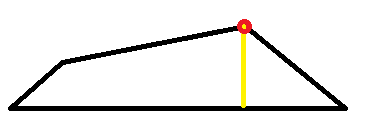
  - 증명은.. 모르겠다. 그냥 직관적으로 저기서 더 좁게 만들 방법이 없는 것 같아보인다.
- 다음은 저 높이를 구하는 방법이다.
  - 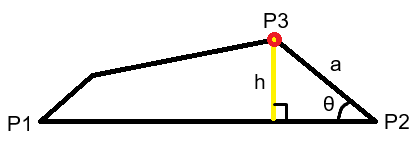
  - 밑변을 이루는 점 을 $P_1, P_2$, 높이를 구하고자 수선을 내릴 기준 점을 $P_3$라고 하자.
  - 점 $P_2, P_3$ 를 이은 변 $\overline{P_2P_3}$ 를 $a$ 라고 하자. 각 점의 좌표를 알고 있으므로 $a$ 의 길이를 구할 수 있다.
  - 또한 벡터 $\overrightarrow{P_1P_2}$ 와 $\overrightarrow{P_2P_3}$ 의 내적을 이용해서, 중심각 $\theta$ 를 구할 수 있다.
  - 이 정도면 구할 건 다 구했다. $a \times \sin\theta$ 를 하면 $h$ 를 구할 수 있다.
- 밑변을 이루는 변 2개를 제외한 나머지 변들에 대해서 위의 과정을 반복한 뒤, 그 중의 최댓값이 최소 너비의 후보가 될 것이다.
  - $n$ 각형에 대해서 매번 $n-2$ 개의 $P_3$ 에 대해 높이를 구해보므로, $O(N^2)$ 이다.
- 0.01의 배수로 올림하고, 소숫점 둘째자리까지 출력하랬으니 출력에 주의해보자.

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

ccw = lambda o, a, b: (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
def andrews(P: list[tuple[int, int]]) -> list[tuple[int, int]]:
  P = sorted(P)

  lo = []
  for p in P:
    while len(lo) >= 2 and ccw(lo[-2], lo[-1], p) <= 0:
      lo.pop()
    lo.append(p)
  lo.pop()

  up = []
  for p in reversed(P) :
    while len(up) >= 2 and ccw(up[-2], up[-1], p) <= 0:
      up.pop()
    up.append(p)
  up.pop()
  
  return lo + up

import math
dot = lambda a, b, c: (a[0] - b[0]) * (c[0] - b[0]) + (a[1] - b[1]) * (c[1] - b[1])
def height(A: tuple[int, int], B: tuple[int, int], C: tuple[int, int]):
  d1 = math.dist(A, B)
  d2 = math.dist(B, C)

  inner = dot(A, B, C)
  th = math.acos(inner / (d1 * d2))
  th = math.pi - th
  h = d2 * math.sin(th)
  return h

INF = 1e9
def sol(N) :
  P = [tuple(map(int, input().split())) for _ in range(N)]
  P = andrews(P)
  lenP = len(P)
  
  ans = INF
  for i, p1 in enumerate(P) :
    p2 = P[(i + 1) % lenP]
    res = 0
    for j in range(i, i + lenP - 2) :
      p3 = P[(j + 2) % lenP]
      res = max(res, height(p1, p2, p3))
    ans = min(ans, res)
  return ans

T = 1
ans = []
while (N := int(input())) != 0 :
  res = sol(N)
  #소수 둘째짜리까지 올림
  if res - float(f"{res:.2f}") > 1e-12 :
    res += 0.01
  ans.append(f"Case {T}: {res:.2f}")
  T += 1

sys.stdout.write("\n".join(ans))

### 자력솔(인데 틀림)
- 조심하기로 적었는데도.. 참 쉽지않다. EPS를 반드시 넣는 구현을 하는 습관을 들여야 할 것 같다.